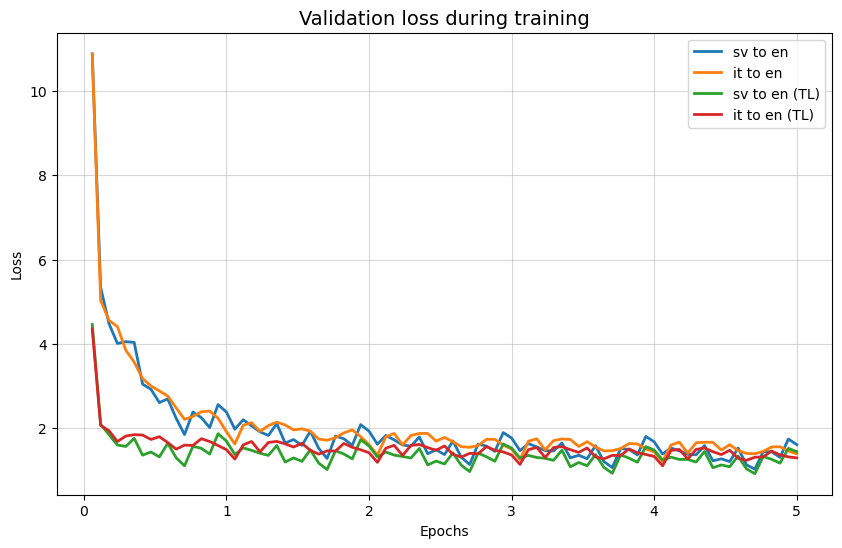

In [37]:
import matplotlib.pyplot as plt
import numpy as np

files = {}
files["sv to en"] = "runs/training_logs_sv.out"
files["it to en"] = "runs/training_logs_it.out"
files["sv to en (TL)"] = "runs/training_logs_transfer_learning_it_to_sv.out"
files["it to en (TL)"] = "runs/training_logs_transfer_learning_sv_to_it.out"

nr_epochs = 5

plt.figure(figsize=(10, 6))

for model in files.keys():
    file_name = files[model]
    losses = []

    with open(file_name, 'r') as file:
        for line in file:
            if line.startswith("At epoch"):
                loss_str = line.strip().split(" = ")[1]
                loss = float(loss_str)
                losses.append(loss)

    nr_datapoints = len(losses)
    nr_datapoints_per_epoch = nr_datapoints

    x = np.linspace(0, nr_epochs, nr_datapoints+1)[1:] # The model is not evaluate before any training has occurred

    plt.plot(x, losses, label=model, linewidth=2)

plt.legend(fontsize=10)
plt.grid(True, alpha=0.5)
plt.title('Validation loss during training', fontsize=14)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

